In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt

$$
\ddot \theta + \omega ^2 \sin \theta = A \cos \omega_1 t
$$

$$
\dot \theta  = v_{\theta} \\
\dot v_{\theta} = - \omega ^2 \sin \theta + A \cos \omega_1 t
$$

$$
\mathbb{J}^* = 
\left ( \begin{matrix}
0 & 1 & 0\\
-\omega^2 \cos\theta & 0 & -\omega _1 A \sin \omega_1 t
\end{matrix}
\right)
$$

In [63]:
def pendulo_simple(x , t , args=[0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1
    return np.array([ x[1] , -np.sin(x[0]) + args[0]*np.cos(args[1]*t)])

def J_pendulo_simple(x , t , args=[0,0]):
    # J = [(0, 1) , (-w2 cos(th) , 0)]
    # args = Amplitud , omega_1
    return np.array([[0, 1,0] , [-np.cos(x[0]) , 0,-args[0]*args[1]*np.sin(args[1]*t)]])

def EDO_Jac(g,Jac,x0,t,args=None):
    #para un sistema NO autonomo
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        g_vec = g(sol[:,i],t[i],args) 
        J_mat = Jac(sol[:,i],t[i],args)
        sol[:,i+1] = sol[:,i] + h*g_vec
        sol[:,i+1] += 0.5*(h**2)*np.dot( J_mat , np.concatenate((g_vec,[1])) )
    return sol

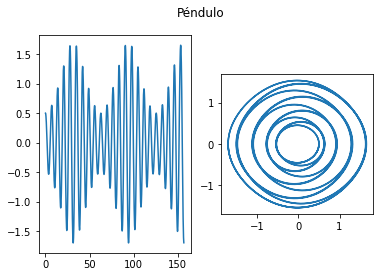

In [96]:
t = np.arange(0,50*np.pi,0.001)
sol = EDO_Jac(pendulo_simple,J_pendulo_simple,[0.5,0],t,args=[0.1,1])
figura , (graf1,graf2) = plt.subplots(1,2)
figura.suptitle('Péndulo')
graf1.plot(t,sol[0,:])
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')

$$
\ddot \theta + \gamma \dot \theta + \omega ^2 \sin \theta = A \cos \omega_1 t
$$

$$
\dot \theta  = v_{\theta} \\
\dot v_{\theta} = - \omega ^2 \sin \theta - \gamma v_{\theta} + A \cos \omega_1 t
$$

$$
\mathbb{J}^* = 
\left ( \begin{matrix}
0 & 1 & 0\\
-\omega^2 \cos\theta & -\gamma & -\omega _1 A \sin \omega_1 t
\end{matrix}
\right)
$$

In [181]:
def pendulo_cff(x , t , args=[0,0,0]):
    # x = (theta, v_theta)
    # args = Amplitud , omega_1 , gamma
    return np.array([ x[1] , -np.sin(x[0]) - args[2]*x[1] + args[0]*np.cos(args[1]*t)])

def J_pendulo_cff(x , t , args=[0,0,0]):
    # args = Amplitud , omega_1 , gamma
    return np.array([[0, 1,0] , [-np.cos(x[0]) , -args[2] ,-args[0]*args[1]*np.sin(args[1]*t)]])

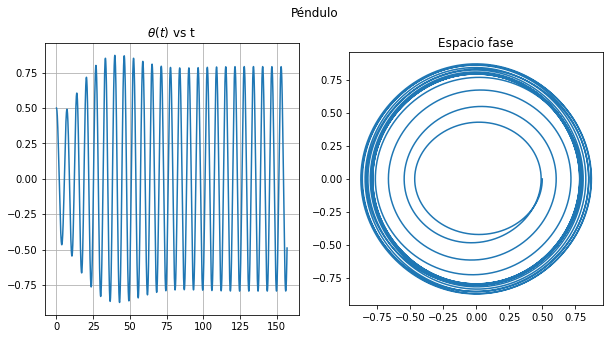

In [182]:
t = np.arange(0,50*np.pi,0.005)
sol = EDO_Jac(pendulo_cff,J_pendulo_cff,[0.5,0],t,args=[0.1,1,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')

In [183]:
def Jac_num(g,x,t,h=0.01,args=None):
    Jac = np.zeros((len(x),len(x)+1))
    for i in range(len(x)):
        xi_d , xi_i= np.copy(x) , np.copy(x)
        xi_d[i] += h
        xi_i[i] += -h
        Jac[:,i] = g(xi_d,t,args) - g(xi_i,t,args)
    Jac[:,-1] = g(x,t+h,args) - g(x,t-h,args)
    return Jac/(2*h)

In [190]:
J_pendulo_cff([1,0],1,[0.2,0.1,0.5])

array([[ 0.        ,  1.        ,  0.        ],
       [-0.54030231, -0.5       , -0.00199667]])

In [192]:
Jac_num(pendulo_cff,np.array([1.0,0.0]),1,args=[0.2,0.1,0.5])

array([[ 0.        ,  1.        ,  0.        ],
       [-0.5402933 , -0.5       , -0.00199667]])

In [195]:
def EDO_Jac_num(g,x0,t,args=None):
    #para un sistema NO autonomo
    h , sol = t[1]-t[0] , np.zeros( (len(x0),len(t)) )
    sol[:,0] = x0 #condicion inicial
    for i in range(len(t)-1):
        g_vec = g(sol[:,i],t[i],args) 
        J_mat = Jac_num(g,sol[:,i],t[i],args=args)
        sol[:,i+1] = sol[:,i] + h*g_vec
        sol[:,i+1] += 0.5*(h**2)*np.dot( J_mat , np.concatenate((g_vec,[1])) )
    return sol

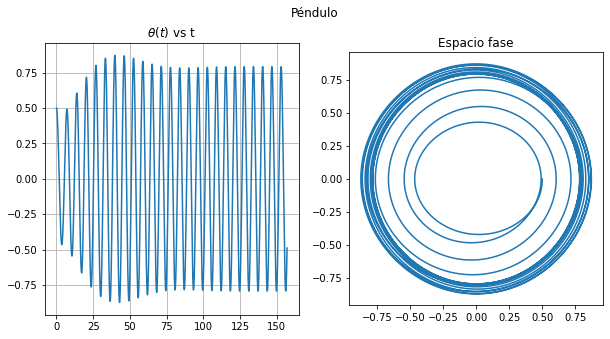

In [196]:
t = np.arange(0,50*np.pi,0.005)
sol = EDO_Jac_num(pendulo_cff,[0.5,0],t,args=[0.1,1.0,0.1])
figura , (graf1,graf2) = plt.subplots(1,2,figsize=(10,5))
figura.suptitle('Péndulo')
graf1.set_title(r'$\theta (t)$ vs t')
graf1.plot(t,sol[0,:])
graf1.grid()
graf2.set_title('Espacio fase')
graf2.plot(sol[0,:],sol[1,:])
graf2.set_aspect('equal')